In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df1 = df.reset_index()['hourly_traffic_count']
df1 = df1.iloc[:9792,]

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [6]:
window = 288
X,y = create_dataset(df1,window)

In [7]:
X.shape, y.shape

((9503, 288), (9503,))

In [8]:
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
X_train, X_test = X[0:training_size,:], X[training_size:,:]

In [9]:
X_train.shape , X_test.shape

((7833, 288), (1670, 288))

In [10]:
y_train, y_test = y[0:training_size,], y[training_size:,]

In [11]:
y_train.shape , y_test.shape

((7833,), (1670,))

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Model

In [13]:
from keras.layers import LSTM

In [14]:
model = Sequential()
model.add(LSTM(50, input_shape=(288, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
245/245 [==============================] - 21s 84ms/step - loss: 0.0091
Epoch 2/50
245/245 [==============================] - 23s 92ms/step - loss: 0.0056
Epoch 3/50
245/245 [==============================] - 20s 83ms/step - loss: 0.0055
Epoch 4/50
245/245 [==============================] - 23s 95ms/step - loss: 0.0053
Epoch 5/50
245/245 [==============================] - 25s 100ms/step - loss: 0.0051
Epoch 6/50
245/245 [==============================] - 22s 89ms/step - loss: 0.0051
Epoch 7/50
245/245 [==============================] - 22s 91ms/step - loss: 0.0051
Epoch 8/50
245/245 [==============================] - 22s 88ms/step - loss: 0.0051
Epoch 9/50
245/245 [==============================] - 22s 89ms/step - loss: 0.0050
Epoch 10/50
245/245 [==============================] - 23s 95ms/step - loss: 0.0050
Epoch 11/50
245/245 [==============================] - 21s 84ms/step - loss: 0.0050
Epoch 12/50
245/245 [==============================] - 22s 90ms/step - loss: 0.0050


In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [17]:
X_test.shape

(1670, 288, 1)

In [18]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [19]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

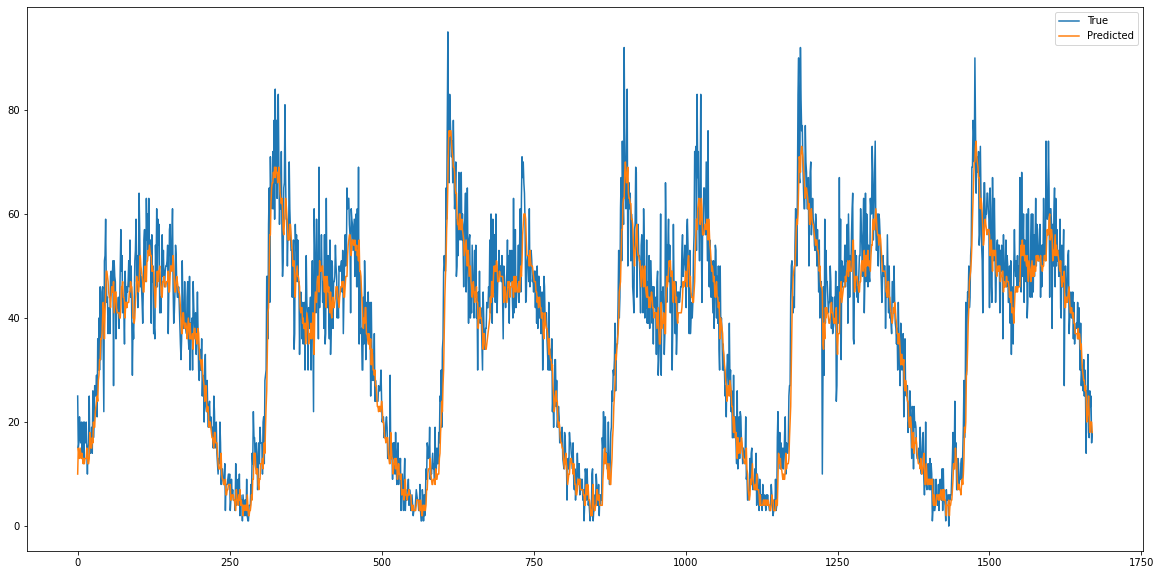

In [20]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='True')
plt.plot(test_predict, label = 'Predicted')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 8.140561088756746
MAE-train: 5.9250606408783355
R_2-train: 0.8826653290981501


In [22]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-train:',r2_score(y_test,test_predict))

RMSE-test: 7.282248122973488
MAE-test: 5.458682634730539
R_2-train: 0.8680820147579846
